# Intent Analysis

## Introduction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
with open('intent.json') as f:
    data = json.load(f)

In [3]:
data

{'intents': [{'intent': 'Greeting',
   'text': ['Hi',
    'Hi there',
    'Hola',
    'Hello',
    'Hello there',
    'Hya',
    'Hya there'],
   'responses': ['Hi human, please tell me your GeniSys user',
    'Hello human, please tell me your GeniSys user',
    'Hola human, please tell me your GeniSys user'],
   'extension': {'function': '', 'entities': False, 'responses': []},
   'context': {'in': '', 'out': 'GreetingUserRequest', 'clear': False},
   'entityType': 'NA',
   'entities': []},
  {'intent': 'GreetingResponse',
   'text': ['My user is Adam',
    'This is Adam',
    'I am Adam',
    'It is Adam',
    'My user is Bella',
    'This is Bella',
    'I am Bella',
    'It is Bella'],
   'responses': ['Great! Hi <HUMAN>! How can I help?',
    'Good! Hi <HUMAN>, how can I help you?',
    'Cool! Hello <HUMAN>, what can I do for you?',
    'OK! Hola <HUMAN>, how can I help you?',
    'OK! hi <HUMAN>, what can I do for you?'],
   'extension': {'function': 'extensions.gHumans.updateHum

In [4]:
df = pd.DataFrame(data['intents'])
df_2 = df.copy()
df.head()

,intent,text,responses,extension,context,entityType,entities
0,Greeting,"[Hi, Hi there, Hola, Hello, Hello there, Hya, ...","[Hi human, please tell me your GeniSys user, H...","{'function': '', 'entities': False, 'responses...","{'in': '', 'out': 'GreetingUserRequest', 'clea...",NA,[]
1,GreetingResponse,"[My user is Adam, This is Adam, I am Adam, It ...","[Great! Hi <HUMAN>! How can I help?, Good! Hi ...","{'function': 'extensions.gHumans.updateHuman',...","{'in': 'GreetingUserRequest', 'out': '', 'clea...",NA,"[{'entity': 'HUMAN', 'rangeFrom': 3, 'rangeTo'..."
2,CourtesyGreeting,"[How are you?, Hi how are you?, Hello how are ...","[Hello, I am great, how are you? Please tell m...","{'function': '', 'entities': False, 'responses...","{'in': '', 'out': 'CourtesyGreetingUserRequest...",NA,[]
3,CourtesyGreetingResponse,"[Good thanks! My user is Adam, Good thanks! Th...","[Great! Hi <HUMAN>! How can I help?, Good! Hi ...","{'function': 'extensions.gHumans.updateHuman',...","{'in': 'GreetingUserRequest', 'out': '', 'clea...",NA,"[{'entity': 'HUMAN', 'rangeFrom': 5, 'rangeTo'..."
4,CurrentHumanQuery,"[What is my name?, What do you call me?, Who d...","[You are <HUMAN>! How can I help?, Your name i...",{'function': 'extensions.gHumans.getCurrentHum...,"{'in': '', 'out': 'CurrentHumanQuery', 'clear'...",NA,[]


In [5]:
df_patterns = df[['text','intent']]
df_responses = df[['responses', 'intent']]
df_patterns

,text,intent
0,"[Hi, Hi there, Hola, Hello, Hello there, Hya, ...",Greeting
1,"[My user is Adam, This is Adam, I am Adam, It ...",GreetingResponse
2,"[How are you?, Hi how are you?, Hello how are ...",CourtesyGreeting
3,"[Good thanks! My user is Adam, Good thanks! Th...",CourtesyGreetingResponse
4,"[What is my name?, What do you call me?, Who d...",CurrentHumanQuery
5,"[What is your name?, What could I call you?, W...",NameQuery
6,"[What is your real name?, What is your real na...",RealNameQuery
7,"[What is the time?, What's the time?, Do you k...",TimeQuery
8,"[OK thank you, OK thanks, OK, Thanks, Thank yo...",Thanks
9,"[I am not talking to you, I was not talking to...",NotTalking2U


In [6]:
df_patterns = df_patterns.explode('text')
df_patterns.head()

,text,intent
0,Hi,Greeting
0,Hi there,Greeting
0,Hola,Greeting
0,Hello,Greeting
0,Hello there,Greeting


## Investigating Dataset Attributes

### Displaying Information About Dataset

In [31]:
df_patterns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    143 non-null    object
 1   intent  143 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


### How Many Texts Are There?

In [23]:
df_patterns.text.count()

143

### How Many Intents Are There?

In [20]:
intent_counts = df_patterns.groupby("intent").size().reset_index(name="count")
intent_counts.intent.count()

22

In [21]:
intent_counts

,intent,count
0,Clever,7
1,CourtesyGoodBye,6
2,CourtesyGreeting,7
3,CourtesyGreetingResponse,8
4,CurrentHumanQuery,7
5,GoodBye,4
6,Gossip,6
7,Greeting,7
8,GreetingResponse,8
9,Jokes,6


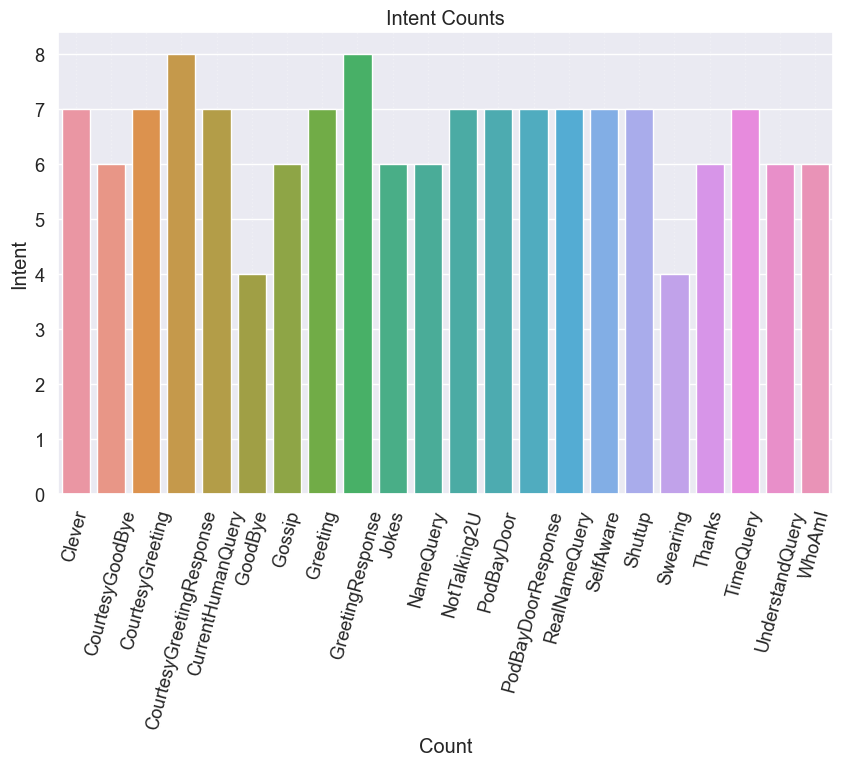

In [55]:
sns.set_palette("pastel")
plt.figure(figsize=(10, 6))
plt.xticks(rotation=75)
sns.barplot(x="intent", y="count", data=intent_counts, orient="v")
plt.title('Intent Counts')
plt.xlabel('Count')
plt.ylabel('Intent')
plt.grid(axis='x', linestyle=':', alpha=0.3)

### Is There Any Null Value?

In [37]:
df_patterns.isnull().sum()

text      0
intent    0
dtype: int64

### Is There Any Duplicated Value?

In [57]:
df_patterns.duplicated().any()

True

In [61]:
df_patterns = df_patterns.drop_duplicates()